# Test script to replace color in an image

Reference : 
* <https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/>
* <https://stackoverflow.com/questions/46903885/map-rgb-semantic-maps-to-one-hot-encodings-and-vice-versa-in-tensorflow>
* <https://datascience.stackexchange.com/questions/48338/why-are-my-predictions-broken-when-performing-image-segmentation-with-tensorflow>
* <https://stackoverflow.com/questions/60761711/how-to-convert-multi-class-one-hot-tensor-to-rgb-in-tensorflow>
* <https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/>

Import necessary library

In [170]:
from PIL import Image
import numpy as np
import os
from skimage import io
import math
import torch
import tensorflow as tf
import scipy.misc

Load ground truth image and check the shape and the uniq colors

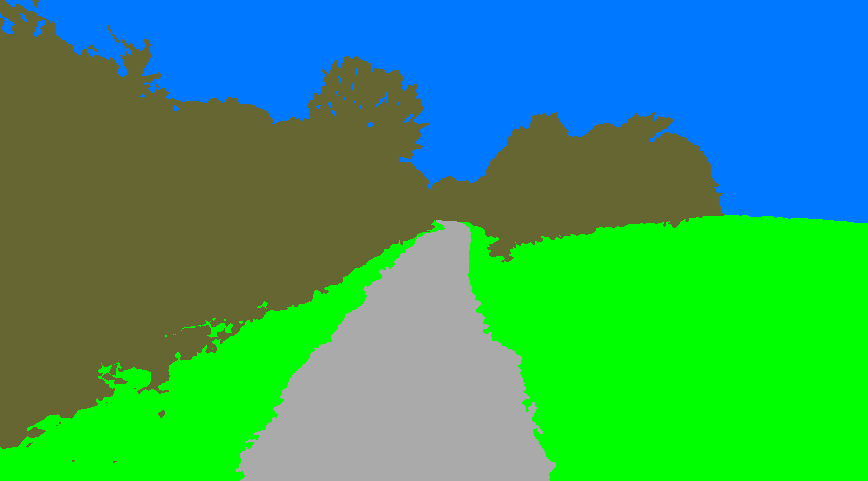

In [171]:
home_gt='/home/vincelf/downloads/freiburg_forest_annotated/test/GT_color'
gt_color='b1-09517_Clipped.png'
gt_color_f = os.path.join(home_gt, gt_color)
#gt_color_img = io.imread(gt_color_f)
#gt_color_img.shape
#(481, 868, 3)
gt_color_img = Image.open(gt_color_f)
gt_color_img

In [172]:
gt_color_img_rgb = gt_color_img.convert('RGB')
gt_data = np.array(gt_color_img_rgb)   # "data" is a height x width x 4 numpy array
gt_data.shape

(481, 868, 3)

In [173]:
gt_color_ref = set( tuple(v) for m2d in gt_data for v in m2d )
gt_color_ref

{(0, 120, 255), (0, 255, 0), (102, 102, 51), (170, 170, 170)}

Load predicted image and check the shape and the uniq colors

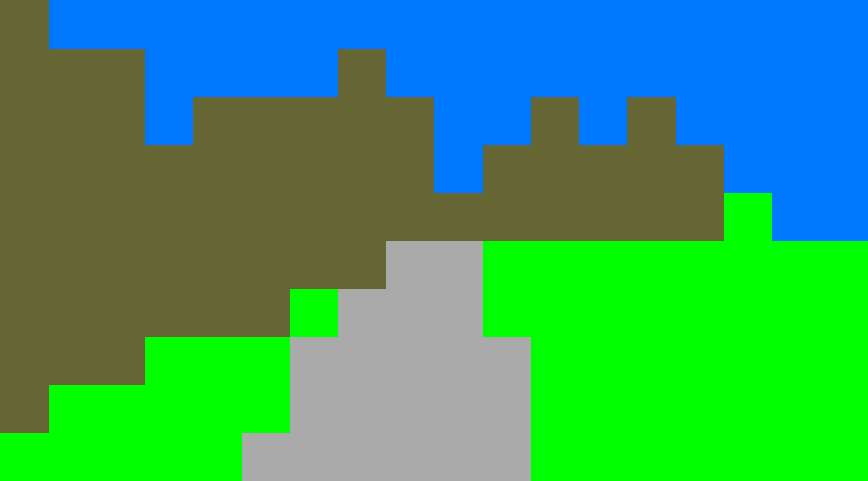

In [174]:
home_pred='/home/vincelf/upload'
color_pred='b1-09517_Clipped_pred_new_color.jpg'
color_pred_f = os.path.join(home_pred, color_pred)
color_pred_img_io_imread = io.imread(color_pred_f)
color_pred_img = Image.open(color_pred_f)
color_pred_img

In [175]:
color_pred_img_rgb = color_pred_img.convert('RGB')
pred_data = np.array(color_pred_img_rgb)   # "data" is a height x width x 4 numpy array
pred_data.shape

(481, 868, 3)

check the uniq colors

In [176]:
color_set = set( tuple(v) for m2d in pred_data for v in m2d )
color_set

{(0, 118, 254),
 (0, 119, 255),
 (0, 120, 253),
 (0, 120, 255),
 (0, 121, 254),
 (0, 121, 255),
 (0, 254, 0),
 (0, 255, 0),
 (0, 255, 1),
 (1, 119, 255),
 (1, 255, 0),
 (1, 255, 1),
 (2, 120, 254),
 (2, 120, 255),
 (100, 102, 52),
 (100, 103, 50),
 (101, 101, 49),
 (101, 101, 51),
 (101, 103, 53),
 (101, 104, 51),
 (102, 100, 51),
 (102, 101, 53),
 (102, 102, 48),
 (102, 102, 50),
 (102, 102, 52),
 (103, 101, 50),
 (103, 101, 52),
 (103, 101, 53),
 (103, 103, 51),
 (103, 103, 53),
 (104, 102, 51),
 (104, 102, 53),
 (169, 169, 169),
 (169, 171, 168),
 (169, 171, 170),
 (170, 170, 168),
 (170, 170, 170),
 (170, 170, 172),
 (170, 172, 171),
 (171, 169, 170),
 (171, 169, 172),
 (171, 171, 169),
 (171, 171, 171),
 (171, 171, 173),
 (172, 170, 171),
 (172, 171, 169)}

In [177]:
ref_color_set = gt_color_ref
color_set_map = []
for color in color_set:
    these_ref_color = []
    c1 = color[0] + 0.00001
    for ref_color in ref_color_set:
        ref_c1 = ref_color[0] + 0.00001
        rel_c1 = round(math.sqrt(abs(c1 - ref_c1)**2))
        if( rel_c1 <= 2 ):
            these_ref_color.append(ref_color)
    print(these_ref_color)
    # loop in the sub array if more than one color
    this_ref_color = ()
    c2 = color[1] + 0.00001
    for ref_color in these_ref_color:
        ref_c2 = ref_color[1] + 0.00001
        rel_c2 = round(math.sqrt(abs(c2 - ref_c2)**2))
        if( rel_c2 <= 2 ):
            this_ref_color = ref_color
    print(color, round(c1), round(ref_c1), round(c2), round(ref_c2), this_ref_color)
    color_set_map.append([color, this_ref_color])
print(color_set_map)

[(102, 102, 51)]
(101, 101, 49) 101.0 0.0 101.0 102.0 (102, 102, 51)
[(0, 255, 0), (0, 120, 255)]
(0, 255, 1) 0.0 0.0 255.0 120.0 (0, 255, 0)
[(170, 170, 170)]
(171, 169, 170) 171.0 0.0 169.0 170.0 (170, 170, 170)
[(102, 102, 51)]
(104, 102, 51) 104.0 0.0 102.0 102.0 (102, 102, 51)
[(102, 102, 51)]
(101, 101, 51) 101.0 0.0 101.0 102.0 (102, 102, 51)
[(0, 255, 0), (0, 120, 255)]
(0, 120, 255) 0.0 0.0 120.0 120.0 (0, 120, 255)
[(170, 170, 170)]
(169, 169, 169) 169.0 0.0 169.0 170.0 (170, 170, 170)
[(170, 170, 170)]
(170, 170, 170) 170.0 0.0 170.0 170.0 (170, 170, 170)
[(170, 170, 170)]
(172, 171, 169) 172.0 0.0 171.0 170.0 (170, 170, 170)
[(0, 255, 0), (0, 120, 255)]
(0, 120, 253) 0.0 0.0 120.0 120.0 (0, 120, 255)
[(102, 102, 51)]
(100, 103, 50) 100.0 0.0 103.0 102.0 (102, 102, 51)
[(102, 102, 51)]
(102, 100, 51) 102.0 0.0 100.0 102.0 (102, 102, 51)
[(170, 170, 170)]
(170, 170, 168) 170.0 0.0 170.0 170.0 (170, 170, 170)
[(0, 255, 0), (0, 120, 255)]
(2, 120, 255) 2.0 0.0 120.0 120.0 (0, 1

In [178]:
red, green, blue = pred_data.T # Temporarily unpack the bands for readability
red, green, blue

(array([[102, 102, 102, ...,   0,   0,   0],
        [102, 102, 102, ...,   0,   0,   0],
        [102, 102, 102, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[102, 102, 102, ..., 255, 255, 255],
        [102, 102, 102, ..., 255, 255, 255],
        [102, 102, 102, ..., 255, 255, 255],
        ...,
        [120, 120, 120, ..., 255, 255, 255],
        [120, 120, 120, ..., 255, 255, 255],
        [120, 120, 120, ..., 255, 255, 255]], dtype=uint8),
 array([[ 52,  52,  52, ...,   1,   1,   1],
        [ 52,  52,  52, ...,   1,   1,   1],
        [ 52,  52,  52, ...,   1,   1,   1],
        ...,
        [255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1]], dtype=uint8))

replace some color by it's reference

In [179]:
# Replace pred_color with reference
# source: https://stackoverflow.com/questions/3752476/python-pil-replace-a-single-rgba-color
# some_color = (red == 101) & (green == 101) & (blue == 49)
# pred_data[some_color.T] = (102, 102, 51) # Transpose back needed

In [180]:
for c in color_set_map:
    # Replace pred_color with reference
    some_color = (red == c[0][0]) & (green == c[0][1]) & (blue == c[0][2])
    pred_data[some_color.T] = (c[1][0], c[1][1], c[1][2]) # Transpose back needed

In [181]:
color_set = set( tuple(v) for m2d in pred_data for v in m2d )
color_set

{(0, 120, 255), (0, 255, 0), (102, 102, 51), (170, 170, 170)}

reconvert into an image

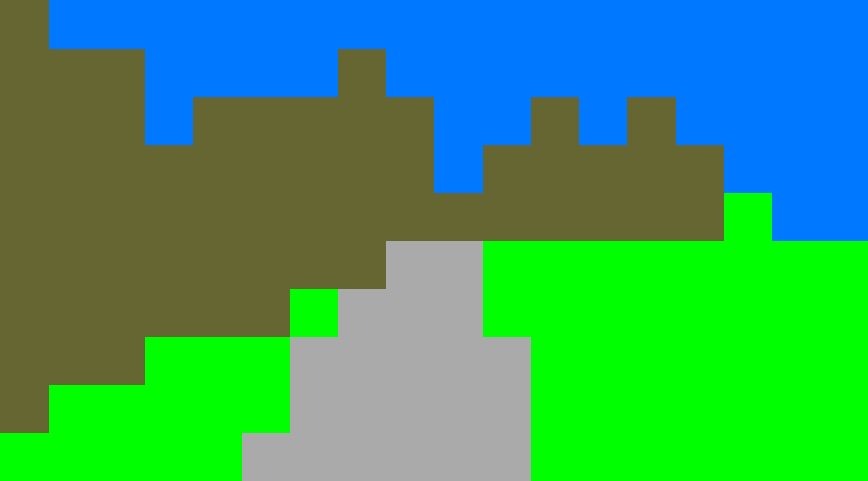

In [182]:
im2 = Image.fromarray(pred_data)
im2

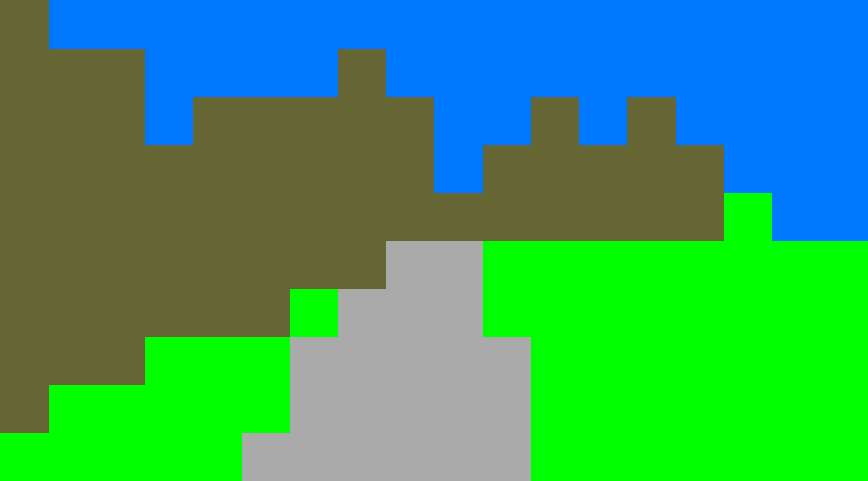

In [183]:
color_pred_img_rgb

convert color to class

In [184]:
#x = torch.LongTensor([[102, 102, 51]])
#x

In [185]:
#arg = torch.LongTensor(pred_data)
#arg

In [186]:
palette = np.array([(0, 120, 255), (0, 255, 0), (102, 102, 51), (170, 170, 170)], np.uint8)
palette

array([[  0, 120, 255],
       [  0, 255,   0],
       [102, 102,  51],
       [170, 170, 170]], dtype=uint8)

In [187]:
color_pred_img_io_imread

array([[[102, 102,  52],
        [102, 102,  52],
        [102, 102,  52],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  52],
        [102, 102,  52],
        [102, 102,  52],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  52],
        [102, 102,  52],
        [102, 102,  52],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       ...,

       [[  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1],
        ...,
        [  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1]],

       [[  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1],
        ...,
        [  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1]],

       [[  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1],
        ...,
        [  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1]]

In [188]:
semantic_map = []
for colour in palette:
  class_map = tf.reduce_all(tf.equal(pred_data, colour), axis=-1)
  semantic_map.append(class_map)
semantic_map

[<tf.Tensor: shape=(481, 868), dtype=bool, numpy=
 array([[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])>,
 <tf.Tensor: shape=(481, 868), dtype=bool, numpy=
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])>,
 <tf.Tensor: shape=(481, 868), dtype=bool, numpy=
 array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  Tru

In [189]:
semantic_map = tf.stack(semantic_map, axis=-1)
semantic_map

<tf.Tensor: shape=(481, 868, 4), dtype=bool, numpy=
array([[[False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        ...,
        [ True, False, False, False],
        [ True, False, False, False],
        [ True, False, False, False]],

       [[False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        ...,
        [ True, False, False, False],
        [ True, False, False, False],
        [ True, False, False, False]],

       [[False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        ...,
        [ True, False, False, False],
        [ True, False, False, False],
        [ True, False, False, False]],

       ...,

       [[False,  True, False, False],
        [False,  True, False, False],
        [False,  True, False, False],
        ...,
        [False,  True, False, False],
        [False,  True, False, False],
   

In [190]:
# NOTE cast to tf.float32 because most neural networks operate in float32.
semantic_map = tf.cast(semantic_map, tf.float32)
semantic_map

<tf.Tensor: shape=(481, 868, 4), dtype=float32, numpy=
array([[[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       ...,

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],

In [191]:
semantic_map.shape

TensorShape([481, 868, 4])

In [199]:
y_pred = np.expand_dims(semantic_map,0)
y_pred

array([[[[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
 

In [200]:
y_pred.shape

(1, 481, 868, 4)

In [202]:
def iou_score(y_true, y_pred):
  intersection = np.logical_and(y_true, y_pred)
  union = np.logical_or(y_true, y_pred)
  iou_score = np.sum(intersection) / np.sum(union)
  return iou_score

In [206]:
gt_semantic_map = []
for colour in palette:
  class_map = tf.reduce_all(tf.equal(gt_data, colour), axis=-1)
  gt_semantic_map.append(class_map)
gt_semantic_map
gt_semantic_map = tf.stack(gt_semantic_map, axis=-1)
gt_semantic_map
# NOTE cast to tf.float32 because most neural networks operate in float32.
gt_semantic_map = tf.cast(gt_semantic_map, tf.float32)
gt_semantic_map
y_true = np.expand_dims(gt_semantic_map,0)
y_true

array([[[[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
 

In [207]:
iou_score(y_true, y_pred)

0.8455390749495525

In [203]:
#palette = tf.constant(palette, dtype=tf.uint8)
#palette

In [204]:
#class_indexes = tf.argmax(semantic_map, axis=-1)
#class_indexes.shape

In [205]:
#new = np.expand_dims(class_indexes,0)
#new.shape

In [195]:
#new2 = np.stack((new,)*4,-1)
#new2.shape

In [196]:
#new2

In [197]:
# NOTE this operation flattens class_indexes
#class_indexes = tf.reshape(class_indexes, [-1])
#class_indexes

In [198]:
#color_image = tf.gather(palette, class_indexes)
#color_image

In [167]:
#converted_tensor = torch.nn.functional.embedding(torch.LongTensor([102]), x)
#converted_tensor